# The z-Distribution <hr style="border:2.5px solid #1b92c5ff"></hr>

<b>Raff Larrynz Jumayao</b>
<br>Computer Engineer

In [1]:
# imports and packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 

In [2]:
# load dataset 
df = pd.read_csv(r"dataset\transformer-voltage.csv",
                 index_col='Sample',
                 delimiter=",")
df

,Voltage
Sample,
1,117.0
2,118.3
3,119.5
4,119.5
5,119.6
6,119.6
7,119.7
8,119.7
9,119.7


In [3]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [4]:
# summary of statistics
df.describe()

,Voltage
count,30.000000
mean,120.290000
std,1.243285
min,117.000000
25%,119.700000
50%,120.100000
75%,120.500000
max,123.800000


In [5]:
# z-critical for two-tailed test
alpha = 0.01
z_critical = stats.norm.ppf(1-alpha/2)
z_critical 

np.float64(2.5758293035489004)

In [6]:
# condifidence interval
pop_std = 5

ci_lower, ci_upper = stats.norm.interval(
    confidence = 0.95,
    loc = df['Voltage'].mean(),
    scale = pop_std/np.sqrt(df['Voltage'].count())
)

print(f"Confidence Interval: [{ci_lower :.2f}, {ci_upper :.2f}]")

Confidence Interval: [118.50, 122.08]


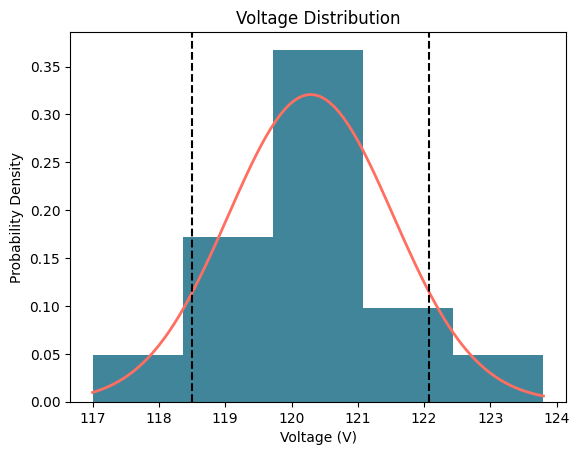

In [7]:
# voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

# normal distribution plot
x = np.linspace(x_min,x_max,100)
p = stats.norm.pdf(x,mean,std)
plt.plot(x,p,
        linewidth=2,
        color='#FF6F61')

# histogram
plt.hist(df['Voltage'],
    bins=5,
    density=True,
    alpha=0.8,
    color='#126782')

plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage (V)')

# confidence interval
plt.axvline(x=ci_lower,
            color='black',
            linestyle='--')
plt.axvline(x=ci_upper,
            color='black',
            linestyle='--')
plt.show()